In [3]:
# Machine Learning for the project
# Oran Howard 18672266
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer

# read in the file
fifa_results_final = pd.read_csv('fifa_results_final_elo.csv')
fifa_results_final = fifa_results_final.drop(fifa_results_final.columns[[0]], axis=1) 
# sort the values by ID so they are in order of first date to last
fifa_results_final.sort_values(by=['ID'], inplace=True)
fifa_results_final

,ID,Game_ID,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,...,total_away_goals,total_home_shot,total_away_shot,game_week_home,game_week_away_x,game_week_away_y,avg_home_goals,avg_away_goals,avg_home_ST,avg_away_AT
0,1,0,E0,2014-08-16,Arsenal,Crystal Palace,2,1,H,1,...,0.0,0.0,0.0,1,1,1,0.000000,0.000000,0.000000,0.000000
1,2,1,E0,2014-08-16,Leicester,Everton,2,2,D,1,...,0.0,0.0,0.0,1,1,1,0.000000,0.000000,0.000000,0.000000
2,3,2,E0,2014-08-16,Man United,Swansea,1,2,A,0,...,0.0,0.0,0.0,1,1,1,0.000000,0.000000,0.000000,0.000000
3,4,3,E0,2014-08-16,QPR,Hull,0,1,A,0,...,0.0,0.0,0.0,1,1,1,0.000000,0.000000,0.000000,0.000000
4,5,4,E0,2014-08-16,Stoke,Aston Villa,0,1,A,0,...,0.0,0.0,0.0,1,1,1,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2275,2276,375,E0,2020-07-26,Leicester,Man United,0,2,A,0,...,24.0,85.0,95.0,19,1,19,1.944444,1.333333,4.722222,5.277778
2276,2277,376,E0,2020-07-26,Man City,Norwich,5,0,H,2,...,7.0,125.0,54.0,19,1,19,2.888889,0.388889,6.944444,3.000000
2277,2278,377,E0,2020-07-26,Newcastle,Liverpool,1,3,A,1,...,30.0,75.0,96.0,19,1,19,1.055556,1.666667,4.166667,5.333333
2278,2279,378,E0,2020-07-26,Southampton,Sheffield United,3,1,H,0,...,14.0,73.0,42.0,19,1,19,1.000000,0.777778,4.055556,2.333333


In [4]:
# data that will be used for classification
classification_data_fifa = fifa_results_final[['FTR','HomeTeam','AwayTeam',
                                           'HTR','ATR','HTP','HTW','HTV','ATP','ATW','ATV',' HGKR','HDefR','HMidR','HAttR','AGKR','ADefR','AMidR','AAttR']]
                                        # 'Difference_Rating','Differnce_Val','Differnce_Wage','Differnce_Attack',
                                       #   'Differnce_Mid','Differnce_Def','Differnce_GK']]
                                         

#classification_data_real = fifa_results_final[['FTR','HomeTeam','AwayTeam','B365H','B365D','B365A','total_home_points','total_away_points',
                                   #        'HomeTeamELO','AwayTeamELO','Difference_Elo','avg_home_goals','avg_away_goals','avg_home_ST',
                                     #    'avg_away_AT',]]
        
#classification_data_all = fifa_results_final[['FTR','HomeTeam','AwayTeam','HTR','ATR','HTP','HTW','HTV','ATP','ATW','ATV',' HGKR','HDefR','HMidR',
 #                                             'HAttR','AGKR','ADefR','AMidR','AAttR','total_home_points','total_away_points',
  #                                           'HomeTeamELO','AwayTeamELO','Difference_Elo','avg_home_goals',
   #                                          'avg_away_goals','avg_home_ST','avg_away_AT','Difference_Rating','Differnce_Val','Differnce_Wage',
    #                                         'B365H','B365D','B365A']]


odds_benchmark = fifa_results_final[['FTR','HomeTeam','AwayTeam','B365H','B365D','B365A']]


# data that will be used for regression
#regression_data = fifa_results_final[['HomeTeam','AwayTeam','FTR','B365H',
                                #          'B365D','B365A','HTR','ATR','AAttR'
                                 #     ,' HGKR','HDefR','HMidR',
                                     #     'HAttR','AGKR','ADefR','AMidR','FTHG','FTAG']]

classification_data_fifa

,FTR,HomeTeam,AwayTeam,HTR,ATR,HTP,HTW,HTV,ATP,ATW,ATV,HGKR,HDefR,HMidR,HAttR,AGKR,ADefR,AMidR,AAttR
0,H,Arsenal,Crystal Palace,79.347826,72.173913,82.000000,101521.73910,1.045652e+07,74.565217,26739.13043,2.166304e+06,78.500000,78.166667,79.833333,80.333333,73.5,71.714286,72.500000,71.500000
1,D,Leicester,Everton,69.391304,76.782609,72.608696,16043.47826,1.227391e+06,79.478261,49565.21739,5.538043e+06,65.666667,69.500000,70.250000,70.250000,76.0,75.428571,77.444444,77.800000
2,A,Man United,Swansea,78.304348,72.782609,82.347826,110608.69570,1.317196e+07,75.826087,31739.13043,3.290217e+06,80.000000,75.571429,77.272727,87.333333,74.0,71.222222,74.000000,73.400000
3,A,QPR,Hull,74.217391,72.347826,76.608696,36739.13043,3.221739e+06,74.869565,30434.78261,2.581304e+06,75.000000,75.000000,73.846154,74.000000,71.0,72.285714,72.900000,71.750000
4,A,Stoke,Aston Villa,74.347826,73.478261,75.826087,41086.95652,3.898913e+06,76.347826,35434.78261,3.201087e+06,76.500000,73.375000,74.000000,76.666667,76.0,72.555556,73.142857,74.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2275,A,Leicester,Man United,76.478261,79.739130,80.695652,60869.56522,1.048696e+07,83.652174,106826.08700,2.004348e+07,78.000000,75.555556,77.666667,76.166667,84.5,79.111111,79.750000,78.750000
2276,H,Man City,Norwich,83.652174,73.043478,87.086957,167391.30430,3.647826e+07,76.391304,32173.91304,4.956522e+06,82.500000,82.250000,83.571429,86.000000,76.5,71.625000,72.909091,76.000000
2277,A,Newcastle,Liverpool,75.869565,81.347826,79.000000,33478.26087,8.869565e+06,84.782609,109173.91300,2.962500e+07,76.500000,75.909091,74.166667,78.000000,82.5,80.500000,82.000000,81.333333
2278,H,Southampton,Sheffield United,75.086957,71.956522,79.260870,40521.73913,8.203261e+06,74.739130,22391.30435,3.963043e+06,75.000000,75.285714,75.100000,74.666667,71.0,71.300000,72.666667,72.800000


In [29]:
#  classification dataset 
def split_encode(classification_data):
    
    labelencoder = LabelEncoder()

    HomeTeam = labelencoder.fit_transform(classification_data['HomeTeam'])
    AwayTeam = labelencoder.fit_transform(classification_data['AwayTeam'])
    
    classification_data['HomeTeam'] = HomeTeam
    classification_data['AwayTeam'] = AwayTeam

    df_val_classification = classification_data.values
    #assigns all the columns except the first column to the variable X
    X_classification = df_val_classification[:,1:40]
    #assigns only the first column as variable Y
    Y_classification = df_val_classification[:,0]
    # converts home win, away win, and draw to label of 0,1,2
    # 0 = Away Win 1 = Draw 2 = Home win
    Y_label = labelencoder.fit_transform(Y_classification)

    X_train_classification, X_test_classification, Y_train_classification, Y_test_classification = train_test_split(X_classification, Y_label, test_size=0.1665,shuffle=False,random_state=0)

    df_X_test_classification = pd.DataFrame(X_test_classification)
    
    return X_train_classification, X_test_classification, Y_train_classification, Y_test_classification,X_classification,Y_classification

fifa_data = split_encode(classification_data_fifa) 
X_train_classification = fifa_data[0]
X_test_classification = fifa_data[1]
Y_train_classification = fifa_data[2]
Y_test_classification = fifa_data[3]

#real_data = split_encode(classification_data_real)
#X_train_classification = real_data[0]
#X_test_classification = real_data[1]
#Y_train_classification = real_data[2]
#Y_test_classification = real_data[3]

X_classification = fifa_data[4]
Y_classification = fifa_data[5]

In [30]:
def convert_teams(X_test_classification,Y_test_classification):
    
    df_Y_train_classification = pd.DataFrame(Y_train_classification)

    #X_classification = pd.DataFrame(X_classification)

    df_X_test_classification = pd.DataFrame(X_test_classification)
    df_Y_test_classification = pd.DataFrame(Y_test_classification)

    # change team names to numeric values so we can encode and output them later
    home_team_train = df_X_test_classification[0]
    home_team_num_list_class = home_team_train.tolist()

    away_team_train = df_X_test_classification[1]
    away_team_num_list_class = away_team_train.tolist() 
    target_names = ['Away Win', 'Draw', 'Home Win']
    
    return home_team_num_list_class, away_team_num_list_class
        
converted_teams = convert_teams(X_test_classification,Y_test_classification)
home_team_num_list_class = converted_teams[0]
away_team_num_list_class = converted_teams[1]

In [31]:
# a label encoder for team names. Converts team names from numbers back to their name
def encode_teams(fifa_results_final,home_team_num_list,away_team_num_list):

    label_encoder = preprocessing.LabelEncoder()
    input_classes = fifa_results_final['HomeTeam'].unique()
    label_encoder.fit(input_classes)

    labels_home = fifa_results_final['HomeTeam'].unique()
    encoded_labels = label_encoder.transform(labels_home)
    home_team_name = label_encoder.inverse_transform(home_team_num_list)

    input_classes_away = fifa_results_final['AwayTeam'].unique()
    label_encoder.fit(input_classes_away)

    labels_away = fifa_results_final['AwayTeam'].unique()
    encoded_labels_away = label_encoder.transform(labels_away)
    away_team_name = label_encoder.inverse_transform(away_team_num_list)
    target_names = ['Away Win', 'Draw', 'Home Win']
        
    return home_team_name,away_team_name

class_encoded = encode_teams(fifa_results_final,home_team_num_list_class,away_team_num_list_class)   
home_team_name_class = class_encoded[0]
away_team_name_class = class_encoded[1]

Randon forest, with 1 trees :
 
accuracy = 0.5026315789473684

               precision    recall  f1-score   support

    Away Win       0.46      0.56      0.51       116
        Draw       0.26      0.08      0.12        92
    Home Win       0.56      0.69      0.62       172

    accuracy                           0.50       380
   macro avg       0.43      0.44      0.41       380
weighted avg       0.46      0.50      0.46       380

Randon forest, with 2 trees :
 
accuracy = 0.5052631578947369

               precision    recall  f1-score   support

    Away Win       0.45      0.52      0.48       116
        Draw       0.25      0.04      0.07        92
    Home Win       0.55      0.74      0.63       172

    accuracy                           0.51       380
   macro avg       0.42      0.43      0.40       380
weighted avg       0.45      0.51      0.45       380

Randon forest, with 5 trees :
 
accuracy = 0.5131578947368421

               precision    recall  f1-score   

/Users/oran/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/oran/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/oran/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Randon forest, with 20 trees :
 
accuracy = 0.5078947368421053

               precision    recall  f1-score   support

    Away Win       0.48      0.46      0.47       116
        Draw       0.00      0.00      0.00        92
    Home Win       0.52      0.81      0.63       172

    accuracy                           0.51       380
   macro avg       0.33      0.42      0.37       380
weighted avg       0.38      0.51      0.43       380



/Users/oran/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/oran/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/oran/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Randon forest, with 30 trees :
 
accuracy = 0.5105263157894737

               precision    recall  f1-score   support

    Away Win       0.49      0.46      0.47       116
        Draw       0.00      0.00      0.00        92
    Home Win       0.52      0.82      0.64       172

    accuracy                           0.51       380
   macro avg       0.34      0.43      0.37       380
weighted avg       0.38      0.51      0.43       380



/Users/oran/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/oran/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/oran/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Randon forest, with 40 trees :
 
accuracy = 0.5105263157894737

               precision    recall  f1-score   support

    Away Win       0.49      0.44      0.46       116
        Draw       0.00      0.00      0.00        92
    Home Win       0.52      0.83      0.64       172

    accuracy                           0.51       380
   macro avg       0.34      0.42      0.37       380
weighted avg       0.38      0.51      0.43       380



/Users/oran/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/oran/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/oran/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Randon forest, with 50 trees :
 
accuracy = 0.5105263157894737

               precision    recall  f1-score   support

    Away Win       0.49      0.44      0.46       116
        Draw       0.00      0.00      0.00        92
    Home Win       0.52      0.83      0.64       172

    accuracy                           0.51       380
   macro avg       0.34      0.42      0.37       380
weighted avg       0.38      0.51      0.43       380



/Users/oran/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/oran/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/oran/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Randon forest, with 100 trees :
 
accuracy = 0.5157894736842106

               precision    recall  f1-score   support

    Away Win       0.51      0.43      0.47       116
        Draw       0.00      0.00      0.00        92
    Home Win       0.52      0.85      0.64       172

    accuracy                           0.52       380
   macro avg       0.34      0.43      0.37       380
weighted avg       0.39      0.52      0.43       380



/Users/oran/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/oran/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/oran/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Randon forest, with 250 trees :
 
accuracy = 0.5131578947368421

               precision    recall  f1-score   support

    Away Win       0.52      0.39      0.44       116
        Draw       0.00      0.00      0.00        92
    Home Win       0.51      0.87      0.65       172

    accuracy                           0.51       380
   macro avg       0.34      0.42      0.36       380
weighted avg       0.39      0.51      0.43       380



/Users/oran/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/oran/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/oran/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Randon forest, with 500 trees :
 
accuracy = 0.46842105263157896

               precision    recall  f1-score   support

    Away Win       0.62      0.09      0.15       116
        Draw       0.00      0.00      0.00        92
    Home Win       0.46      0.98      0.63       172

    accuracy                           0.47       380
   macro avg       0.36      0.35      0.26       380
weighted avg       0.40      0.47      0.33       380



/Users/oran/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/oran/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/oran/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Randon forest, with 750 trees :
 
accuracy = 0.45263157894736844

               precision    recall  f1-score   support

    Away Win       0.00      0.00      0.00       116
        Draw       0.00      0.00      0.00        92
    Home Win       0.45      1.00      0.62       172

    accuracy                           0.45       380
   macro avg       0.15      0.33      0.21       380
weighted avg       0.20      0.45      0.28       380



/Users/oran/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/oran/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/oran/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Randon forest, with 1000 trees :
 
accuracy = 0.45263157894736844

               precision    recall  f1-score   support

    Away Win       0.00      0.00      0.00       116
        Draw       0.00      0.00      0.00        92
    Home Win       0.45      1.00      0.62       172

    accuracy                           0.45       380
   macro avg       0.15      0.33      0.21       380
weighted avg       0.20      0.45      0.28       380



/Users/oran/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/oran/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/oran/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Randon forest, with 2000 trees :
 
accuracy = 0.45263157894736844

               precision    recall  f1-score   support

    Away Win       0.00      0.00      0.00       116
        Draw       0.00      0.00      0.00        92
    Home Win       0.45      1.00      0.62       172

    accuracy                           0.45       380
   macro avg       0.15      0.33      0.21       380
weighted avg       0.20      0.45      0.28       380

Trees  1  Accuracy Score 0.5026315789473684


/Users/oran/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/oran/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/oran/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.5026315789473684,
 0.5052631578947369,
 0.5131578947368421,
 0.5157894736842106,
 0.5078947368421053,
 0.5105263157894737,
 0.5105263157894737,
 0.5105263157894737,
 0.5157894736842106,
 0.5131578947368421,
 0.46842105263157896,
 0.45263157894736844,
 0.45263157894736844,
 0.45263157894736844]

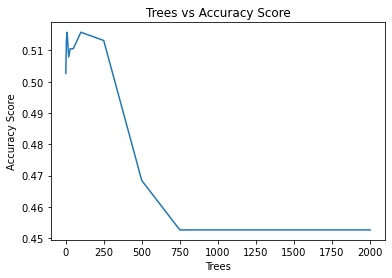

In [14]:
# classification - random forest 

def random_forest(X_train, X_test, Y_train, Y_test):
    tree_accuracy_scores = []
    trees = [1, 2, 5, 10, 20, 30, 40, 50, 100, 250, 500, 750, 1000, 2000] 
    for i in trees: # For each value in list
        rfclf = RandomForestClassifier(n_estimators=1000,min_samples_leaf=i)
        rfclf.fit(X_train, Y_train)
        rfclf_predict = rfclf.predict(X_test)
        tree_accuracy=accuracy_score(Y_test, rfclf_predict) 
        tree_accuracy_scores.append(tree_accuracy)
        #print('Randon forest, with',i,'trees :\n \naccuracy =', accuracy_score(Y_test, rfclf_predict))
        #print('\n',classification_report(Y_test, rfclf_predict, target_names=target_names)) 
        predictions = rfclf.predict_proba(X_test)
        # convert to %
        predictions = predictions*100

    plt.figure()   
    plt.plot(trees, tree_accuracy_scores) 
    plt.ylabel('Accuracy Score') 
    plt.xlabel('Trees') 
    plt.title('Trees vs Accuracy Score')
        
        return tree_accuracy_scores
        
random_forest(X_train_classification,X_test_classification,Y_train_classification,Y_test_classification)


Artifical Neural Network, with 1 epochs :
 
accuracy = 0.45263157894736844

               precision    recall  f1-score   support

    Away Win       0.00      0.00      0.00       116
        Draw       0.00      0.00      0.00        92
    Home Win       0.45      1.00      0.62       172

    accuracy                           0.45       380
   macro avg       0.15      0.33      0.21       380
weighted avg       0.20      0.45      0.28       380

Artifical Neural Network, with 5 epochs :
 
accuracy = 0.5131578947368421

               precision    recall  f1-score   support

    Away Win       0.47      0.59      0.52       116
        Draw       0.00      0.00      0.00        92
    Home Win       0.54      0.73      0.62       172

    accuracy                           0.51       380
   macro avg       0.34      0.44      0.38       380
weighted avg       0.39      0.51      0.44       380

Artifical Neural Network, with 10 epochs :
 
accuracy = 0.5131578947368421

         

[0.45263157894736844,
 0.5131578947368421,
 0.5131578947368421,
 0.5105263157894737,
 0.5105263157894737,
 0.5078947368421053,
 0.5157894736842106,
 0.5157894736842106,
 0.5210526315789473,
 0.5210526315789473,
 0.5026315789473684,
 0.49473684210526314,
 0.5157894736842106,
 0.5078947368421053,
 0.5131578947368421]

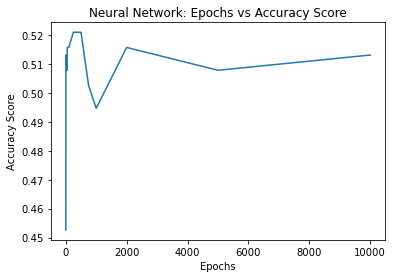

In [15]:
# classification - artificial neural network 

import warnings
warnings.filterwarnings('ignore')
# artificial neural network (ANN)
# using the sklearn library to create an artificial neural network
# activation method as logistic use the sigmoid function as the non-linear activation function for the hidden layers 
# returns f(x) = 1 / (1 + exp(-x)) (scikit-learn, n.d.)
# Multi-layer Perceptron classifier = MLP
# max_iter value = number of epochs. 200 is default. 
# Fit the model to data matrix X and targets y.
# Predict using the multi-layer perceptron classifier 
# different numbers of epochs to monitor how accuracy changes as the
# algorithm keeps learning, which you can plot using the number of epochs in the ‘x’ axis
# and the accuracy in ‘y’ axis.
def ann_mlp(X_train, X_test, Y_train, Y_test):

    ann_accuracy_scores = []
    epochs = [1,5,10, 20, 30, 40, 50, 100, 250, 500, 750, 1000, 2000, 5000, 10000] 

    for i in epochs: # For each value in list
        mlp = MLPClassifier(hidden_layer_sizes=(100,100), activation = 'logistic', max_iter=i)
        mlp.fit(X_train_classification, Y_train_classification)
        Y_predictions = mlp.predict(X_test_classification)
        ann_accuracy=accuracy_score(Y_test_classification, Y_predictions) 
        ann_accuracy_scores.append(ann_accuracy)
        #print('Artifical Neural Network, with',i,'epochs :\n \naccuracy =', accuracy_score(Y_test_classification, Y_predictions))
        #print('\n',classification_report(Y_test_classification, Y_predictions, target_names=target_names)) 
    
    plt.figure()   
    plt.plot(epochs, ann_accuracy_scores) 
    plt.ylabel('Accuracy Score') 
    plt.xlabel('Epochs') 
    plt.title('Neural Network: Epochs vs Accuracy Score')

    return ann_accuracy_scores
    
ann_mlp(X_train_classification,X_test_classification,Y_train_classification,Y_test_classification)


In [18]:
from sklearn.svm import SVC

def svm_classification(kernel,X_train_classification,X_test_classification,Y_train_classification,Y_test_classification):
    
    svm_accuracy_scores = []
    iters = [10, 20, 30, 40, 50, 100, 250, 500, 750, 1000, 2000, 5000, 10000] 
    for i in iters: # For each value in list
        svm_model_linear = SVC(kernel = kernel, max_iter=i).fit(X_train_classification, Y_train_classification)
        svm_predictions_linear = svm_model_linear.predict(X_test_classification)
        accuracy = accuracy_score(Y_test_classification, svm_predictions_linear)
        #print('Support Vector Machine -', kernel, 'with',i,'iterations :\n \naccuracy =', accuracy)
        #print('\n',classification_report(Y_test_classification, svm_predictions_linear, target_names=target_names)) 
        svm_accuracy_scores.append(accuracy)
    
    return svm_accuracy_scores

svm_classification('linear',X_train_classification,X_test_classification,Y_train_classification,Y_test_classification)
svm_classification('poly',X_train_classification,X_test_classification,Y_train_classification,Y_test_classification)
svm_classification('rbf',X_train_classification,X_test_classification,Y_train_classification,Y_test_classification)


[0.27631578947368424,
 0.32105263157894737,
 0.33421052631578946,
 0.35789473684210527,
 0.34210526315789475,
 0.35526315789473684,
 0.3605263157894737,
 0.5105263157894737,
 0.5157894736842106,
 0.5157894736842106,
 0.5157894736842106,
 0.5157894736842106,
 0.5157894736842106]

[0.4868421052631579,
 0.4473684210526316,
 0.46578947368421053,
 0.5105263157894737,
 0.5447368421052632,
 0.5447368421052632,
 0.5263157894736842,
 0.5026315789473684,
 0.49736842105263157,
 0.5078947368421053,
 0.5078947368421053,
 0.5,
 0.5052631578947369,
 0.5184210526315789,
 0.5131578947368421,
 0.45263157894736844,
 0.45263157894736844]

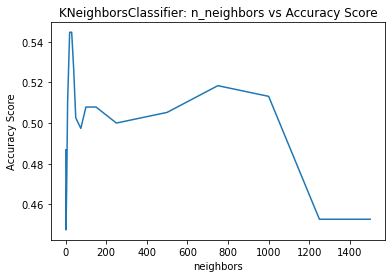

In [27]:
def knn_classification(X_train_classification,X_test_classification,Y_train_classification,Y_test_classification):

    from sklearn.neighbors import KNeighborsClassifier
    n_neighbors = [1, 2, 5, 10, 20, 30, 40, 50, 75, 100, 150, 250, 500, 750, 1000, 1250, 1500] 
    knn_accuracy_scores = []
    for i in n_neighbors: # For each value in list
        knn = KNeighborsClassifier(n_neighbors = i).fit(X_train_classification, Y_train_classification)
        # accuracy on X_test
        knn_accuracy = knn.score(X_test_classification, Y_test_classification)
        # creating a confusion matrix
        knn_accuracy_scores.append(knn_accuracy)
        knn_predictions = knn.predict(X_test_classification) 
        #print('KNeighborsClassifier, with',i,'neighbors :\n \naccuracy =', accuracy_score(Y_test_classification, knn_predictions))
        #print('\n',classification_report(Y_test_classification, knn_predictions, target_names=target_names)) 

    plt.figure()   
    plt.plot(n_neighbors, knn_accuracy_scores) 
    plt.ylabel('Accuracy Score') 
    plt.xlabel('neighbors') 
    plt.title('KNeighborsClassifier: n_neighbors vs Accuracy Score')

    return knn_accuracy_scores

knn_classification(X_train_classification,X_test_classification,Y_train_classification,Y_test_classification)

In [24]:
from sklearn.naive_bayes import GaussianNB

def GaussianNB_class(X_train_classification,X_test_classification,Y_train_classification,Y_test_classification):
    gnb = GaussianNB().fit(X_train_classification, Y_train_classification)
    # accuracy on X_test
    gnb_accuracy = gnb.score(X_test_classification, Y_test_classification)
    # creating a confusion matrix
    gnb_predictions = gnb.predict(X_test_classification) 
    print(classification_report(Y_test_classification, gnb_predictions, target_names=target_names))
    print('accuracy = ', accuracy_score(Y_test_classification, gnb_predictions))
    gs_NB_accuracy = accuracy_score(Y_test_classification, gnb_predictions)
    
    return gs_NB_accuracy
    
GaussianNB_class(X_train_classification,X_test_classification,Y_train_classification,Y_test_classification)

              precision    recall  f1-score   support

    Away Win       0.45      0.55      0.50       116
        Draw       0.00      0.00      0.00        92
    Home Win       0.53      0.74      0.62       172

    accuracy                           0.50       380
   macro avg       0.33      0.43      0.37       380
weighted avg       0.38      0.50      0.43       380

accuracy =  0.5026315789473684


0.5026315789473684

In [25]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

nb_classifier = GaussianNB()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=cv,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train_classification, Y_train_classification)
gs_NB_predictions = gs_NB.predict(X_test_classification)
gs_NB_accuracy=accuracy_score(Y_test_classification, gs_NB_predictions) 


gs_NB.best_params_
gnb = gs_NB.best_score_
gs_NB_accuracy

Fitting 30 folds for each of 100 candidates, totalling 3000 fits


0.5026315789473684

In [109]:
# random search logistic regression
from scipy.stats import loguniform
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
# load dataset
# define model
#model = RandomForestClassifier()

def logistic_regression_optimisation():
    
    model = LogisticRegression()
    # define evaluation
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # define search space
    space = dict()
    space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
    space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
    space['C'] = loguniform(1e-5, 100)
    # define search
    search = RandomizedSearchCV(model, space, n_iter=100, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
    # execute search
    result = search.fit(X_train_classification, Y_train_classification)
    # summarize result
    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_)
    print('scores', result)
    
    clf_logistic_predictions = result.predict(X_test_classification)
    clf_logistic_accuracy=accuracy_score(Y_test_classification, clf_logistic_predictions) 
    print(accuracy_score(Y_test_classification, clf_logistic_predictions))
    print('\n',classification_report(Y_test_classification, clf_logistic_predictions, target_names=target_names)) 

logistic_regression_optimisation()

Best Score: 0.5470175438596491
Best Hyperparameters: {'C': 0.003131281159444946, 'penalty': 'l1', 'solver': 'liblinear'}
scores RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
                   estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x124e0ba90>,
                                        'penalty': ['none', 'l1', 'l2',
                                                    'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']},
                   random_state=1, scoring='accuracy')
0.5157894736842106

               precision    recall  f1-score   support

    Away Win       0.49      0.51      0.50       116
        Draw       0.00      0.00      0.00        92
    Home Win       0.53      0.80      0.64       172

    accuracy           

In [111]:
# best logistic regression model based on random search logistic regression
clf_logistic = LogisticRegression(C=0.003131281159444946, penalty='l1', solver= 'liblinear')
clf_logistic.fit(X_train_classification,Y_train_classification)
clf_logistic_predictions = clf_logistic.predict(X_test_classification)
clf_logistic_accuracy=accuracy_score(Y_test_classification, clf_logistic_predictions) 
print(accuracy_score(Y_test_classification, clf_logistic_predictions))
print('\n',classification_report(Y_test_classification, clf_logistic_predictions, target_names=target_names)) 

0.5210526315789473

               precision    recall  f1-score   support

    Away Win       0.50      0.53      0.51       116
        Draw       0.00      0.00      0.00        92
    Home Win       0.53      0.80      0.64       172

    accuracy                           0.52       380
   macro avg       0.34      0.44      0.38       380
weighted avg       0.39      0.52      0.44       380



In [43]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [1, 2, 5, 10, 20, 30, 40, 50, 100, 250, 500, 750, 1000, 2000]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10, 20, 30, 40, 50, 100, 250, 500, 750, 1000, 2000]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_classification, Y_train_classification)
rf_random.best_params_

print('Best Score: %s' % rf_random.best_score_)
print('Best Hyperparameters: %s' % rf_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Score: 0.5452570919776804
Best Hyperparameters: {'n_estimators': 600, 'min_samples_split': 750, 'min_samples_leaf': 40, 'max_features': 'auto', 'max_depth': 30, 'bootstrap': True}


Randon forest, with 1 trees :
 
accuracy = 0.4921052631578947

               precision    recall  f1-score   support

    Away Win       0.44      0.53      0.48       116
        Draw       0.27      0.10      0.14        92
    Home Win       0.57      0.68      0.62       172

    accuracy                           0.49       380
   macro avg       0.42      0.43      0.41       380
weighted avg       0.45      0.49      0.46       380

Randon forest, with 2 trees :
 
accuracy = 0.5

               precision    recall  f1-score   support

    Away Win       0.47      0.50      0.48       116
        Draw       0.24      0.05      0.09        92
    Home Win       0.54      0.74      0.62       172

    accuracy                           0.50       380
   macro avg       0.42      0.43      0.40       380
weighted avg       0.45      0.50      0.45       380

Randon forest, with 5 trees :
 
accuracy = 0.5078947368421053

               precision    recall  f1-score   support

    Aw

Artifical Neural Network, with 40 epochs :
 
accuracy = 0.5184210526315789

               precision    recall  f1-score   support

    Away Win       0.52      0.43      0.47       116
        Draw       0.00      0.00      0.00        92
    Home Win       0.52      0.85      0.65       172

    accuracy                           0.52       380
   macro avg       0.34      0.43      0.37       380
weighted avg       0.39      0.52      0.44       380

Artifical Neural Network, with 50 epochs :
 
accuracy = 0.5131578947368421

               precision    recall  f1-score   support

    Away Win       0.49      0.52      0.50       116
        Draw       0.00      0.00      0.00        92
    Home Win       0.53      0.78      0.63       172

    accuracy                           0.51       380
   macro avg       0.34      0.43      0.38       380
weighted avg       0.39      0.51      0.44       380

Artifical Neural Network, with 100 epochs :
 
accuracy = 0.5131578947368421

       

NameError: name 'knn_classification' is not defined

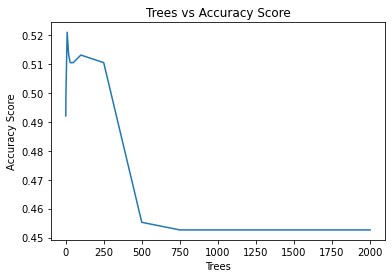

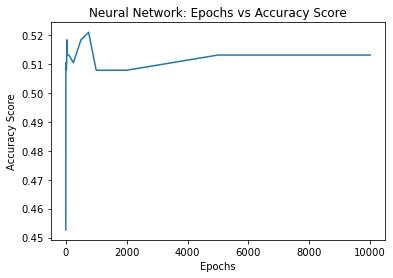

In [26]:
# plot scores 
tree_scores = random_forest(X_train_classification,X_test_classification,Y_train_classification,Y_test_classification)
ann_accuracy_scores = ann_mlp(X_train_classification,X_test_classification,Y_train_classification,Y_test_classification)
gs_NB = GaussianNB(X_train_classification,X_test_classification,Y_train_classification,Y_test_classification)
knn_accuracy_scores = knn_classification(X_train_classification,X_test_classification,Y_train_classification,Y_test_classification)
svm_linear_accuracy_scores = svm_classification('linear',X_train_classification,X_test_classification,Y_train_classification,Y_test_classification)
svm_poly_accuracy_scores = svm_classification('poly',X_train_classification,X_test_classification,Y_train_classification,Y_test_classification)
svm_rbf_accuracy_scores = svm_classification('rbf',X_train_classification,X_test_classification,Y_train_classification,Y_test_classification)

knn = max(knn_accuracy_scores)
ann = max(ann_accuracy_scores)
rf = max(tree_scores)
clf_logistic_accuracy
gnb = max(gs_NB)
svm_poly = max(svm_poly_accuracy_scores)
svm_linear = max(svm_linear_accuracy_scores)
svm_rbf = max(svm_rbf_accuracy_scores)

fig = plt.figure(figsize=(9,5))
ax = fig.add_axes([1,1,1,1])
models = ['RandomForest', 'ANN', 'GaussianNB','LogisticRegression','KNN','SVM poly','SVM linear','SVM rbf']
num_res = [rf,ann,gs_NB_accuracy,clf_logistic_accuracy,knn,svm_poly,svm_linear,svm_rbf]
plt.title('Accuracy for classification models using virtual and real data')
plt.xlabel('Classification Model')
plt.ylabel('Accuracy')

ax.bar(models,num_res)
ax.set_ylim(ymin=0.38)
plt.show()


In [33]:
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
# cross validation on the whole dataset. 
def cross_validation_randomforest(X_classification, Y_classification):
    mean_score = []
    trees = [1, 2, 5, 10, 20, 30, 40, 50, 100, 250, 500, 750, 1000, 2000] 
    for i in trees: # For each value in list
        rfclf = RandomForestClassifier(n_estimators=500,min_samples_leaf=i)
        #print('\nCross Validation Scores for Random Forest Classifier with',i ,'trees:')
        scores_rfc = cross_val_score(rfclf), X_classification, Y_classification, cv=10)
        #print(scores_rfc)
        #print('mean = ', np.mean(scores_rfc))
        mean_score.append(np.mean(scores_rfc))
        
    return max(mean_score)

cross_validation_randomforest(X_classification, Y_classification)

0.5324561403508772

In [37]:
def cross_validation_knn(X_classification, Y_classification):
    mean_score = []
    n_neighbors = [1, 2, 5, 10, 20, 30, 40, 50, 75, 100, 150, 250, 500, 750, 1000, 1250, 1500] 
    for i in n_neighbors: # For each value in list
        knn = KNeighborsClassifier(n_neighbors = i)
        #print('\nCross Validation Scores for KNeighborsClassifier Classifier with',i ,'neighbors:')
        scores_knn = cross_val_score((knn), X_classification, Y_classification, cv=10)
        #print(scores_knn)
        #print('mean = ', np.mean(scores_knn))
        mean_score.append(np.mean(scores_knn))
        
    return max(mean_score)

cross_validation_knn(X_classification, Y_classification)


0.5350877192982457

In [38]:
def cross_validation_ann(X_classification, Y_classification):
    mean_score = []
    epochs = [1,5,10, 20, 30, 40, 50, 100, 250, 500, 750, 1000, 2000, 5000, 10000] 
    for i in epochs: # For each value in list
        mlp = MLPClassifier(hidden_layer_sizes=(100,100), activation = 'logistic', max_iter=i)
        #print('\nCross Validation Scores for ann Classifier with',i ,'epochs:')
        scores_ann = cross_val_score((mlp), X_classification, Y_classification, cv=10)
        #print(scores_ann)
        #print('mean = ', np.mean(scores_ann))
        mean_score.append(np.mean(scores_ann))
        
    return max(mean_score)

cross_validation_ann(X_classification, Y_classification)

0.5311403508771931

In [42]:
def cross_validation_svm(X_classification, Y_classification, kernel):
    mean_score = []
    iters = [1,5,10, 20, 30, 40, 50, 100, 250, 500, 750, 1000, 2000, 5000, 10000] 
    for i in iters: # For each value in list
        svm_model = SVC(kernel = kernel, max_iter=i)        
        #print('\nCross Validation Scores for svm Classifier with',i ,'iters:')
        scores_svm = cross_val_score((svm_model), X_classification, Y_classification, cv=10)
        #print(scores_svm)
        #print('mean = ', np.mean(scores_svm))
        mean_score.append(np.mean(scores_svm))
        
    return max(mean_score)

cross_validation_svm(X_classification, Y_classification,'linear')
cross_validation_svm(X_classification, Y_classification,'poly')
cross_validation_svm(X_classification, Y_classification,'rbf')


0.5096491228070176


Random Forest for best parameters leaf nodes:
              precision    recall  f1-score   support

    Away Win       0.49      0.50      0.49       116
        Draw       0.00      0.00      0.00        92
    Home Win       0.53      0.80      0.64       172

    accuracy                           0.52       380
   macro avg       0.34      0.43      0.38       380
weighted avg       0.39      0.52      0.44       380

accuracy =  0.5157894736842106


/Users/oran/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/oran/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/oran/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


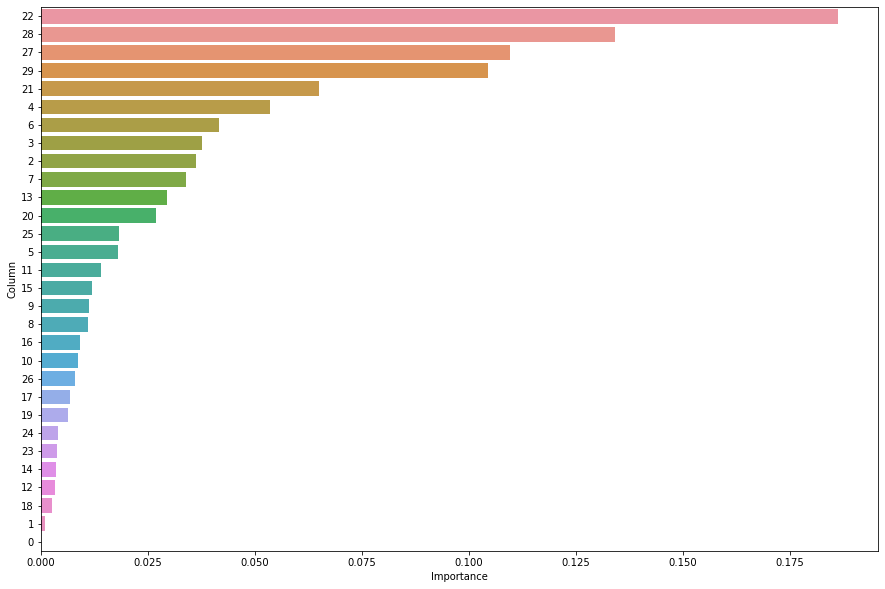

In [21]:
rfc = RandomForestClassifier(n_estimators=200,
 min_samples_split= 500,
 min_samples_leaf=5,
 max_features='sqrt',
 max_depth=80,
 bootstrap= False)
rfc.fit(X_train_classification, Y_train_classification)
#The same steps are repeated that were performed on the MLP Classifier
rfc_predict = rfc.predict(X_test_classification)
confusion_matrix(Y_test_classification, rfc_predict)
print('\nRandom Forest for best parameters leaf nodes:')
print(classification_report(Y_test_classification, rfc_predict, target_names=target_names))
print('accuracy = ', accuracy_score(Y_test_classification, rfc_predict))

import seaborn as sns

def feature_importance(model):
    importance = model.feature_importances_

    list_1 = []
    list_2 = []
    for i,j in zip(importance,df_X_test_classification.columns):
        list_1.append(str(j))
        list_2.append(i)
    
    df_name = pd.DataFrame(list_1,columns=["Column"])
    df_number = pd.DataFrame(list_2,columns=["Importance"])

    df_ranking = pd.concat([df_name, df_number], axis=1)
    df_final = df_ranking.sort_values("Importance",ascending=False).reset_index(drop=True)
    df_final.Column = df_final.Column.astype(str)
    f, ax = plt.subplots(figsize=(15, 10))
    sns.barplot(x="Importance", y="Column", data=df_final)
    
feature_importance(rfc)

In [111]:
knn = KNeighborsClassifier(n_neighbors = 30).fit(X_train_classification, Y_train_classification)
# accuracy on X_test
knn_accuracy = knn.score(X_test_classification, Y_test_classification)
# creating a confusion matrix
knn_predictions = knn.predict(X_test_classification) 
print('KNeighborsClassifier, with 30 neighbors :\n \naccuracy =', accuracy_score(Y_test_classification, knn_predictions))
print('\n',classification_report(Y_test_classification, knn_predictions, target_names=target_names)) 

predictions = pd.DataFrame(knn_predictions)
predictions

predictions['Home Team'] = home_team_name_class
predictions['Away Team'] = away_team_name_class
predictions['Home Team Points'] = knn_predictions
predictions['Away Team Points'] = knn_predictions

predictions.columns = ['Prediction','Home Team','Away Team','Home Team Points','Away Team Points']
predictions

real_results = pd.DataFrame(Y_test_classification)
real_results['Home Team'] = home_team_name_class
real_results['Away Team'] = away_team_name_class
real_results['Home Team Points'] = Y_test_classification
real_results['Away Team Points'] = Y_test_classification

real_results.columns = ['Result','Home Team','Away Team','Home Team Points','Away Team Points']
real_results


KNeighborsClassifier, with 30 neighbors :
 
accuracy = 0.5447368421052632

               precision    recall  f1-score   support

    Away Win       0.52      0.55      0.53       116
        Draw       0.42      0.12      0.19        92
    Home Win       0.57      0.77      0.66       172

    accuracy                           0.54       380
   macro avg       0.50      0.48      0.46       380
weighted avg       0.52      0.54      0.51       380



,Result,Home Team,Away Team,Home Team Points,Away Team Points
0,2,Liverpool,Norwich,2,2
1,0,West Ham,Man City,0,0
2,1,Bournemouth,Sheffield United,1,1
3,2,Burnley,Southampton,2,2
4,1,Crystal Palace,Everton,1,1
...,...,...,...,...,...
375,0,Leicester,Man United,0,0
376,2,Man City,Norwich,2,2
377,0,Newcastle,Liverpool,0,0
378,2,Southampton,Sheffield United,2,2


In [112]:
def add_points(data):
    

    squad_position = data.iloc[:,3].replace(to_replace=2, value=3, regex=False)
    data['Home Team Points'] = squad_position 
    
    squad_position = data.iloc[:,3].replace(to_replace=0, value=0, regex=False)
    data['Home Team Points'] = squad_position 
    
    squad_position = data.iloc[:,3].replace(to_replace=1, value=1, regex=False)
    data['Home Team Points'] = squad_position 
    
    squad_position = data.iloc[:,4].replace(to_replace=0, value=3, regex=False)
    data['Away Team Points'] = squad_position 
    
    squad_position = data.iloc[:,4].replace(to_replace=2, value=0, regex=False)
    data['Away Team Points'] = squad_position 
    
    squad_position = data.iloc[:,4].replace(to_replace=1, value=1, regex=False)
    data['Away Team Points'] = squad_position 
    
    return data

add_points(predictions)
add_points(real_results)

,Result,Home Team,Away Team,Home Team Points,Away Team Points
0,2,Liverpool,Norwich,3,0
1,0,West Ham,Man City,0,3
2,1,Bournemouth,Sheffield United,1,1
3,2,Burnley,Southampton,3,0
4,1,Crystal Palace,Everton,1,1
...,...,...,...,...,...
375,0,Leicester,Man United,0,3
376,2,Man City,Norwich,3,0
377,0,Newcastle,Liverpool,0,3
378,2,Southampton,Sheffield United,3,0


In [119]:
def get_points(football_results):
    
    # initialise arrays
    home_points = []
    away_points = []
    team_name = []
    cumlative_home_points = []
    cumlative_away_points = []
    
    # converts columns to numeric values 
    football_results["Home Team Points"] = pd.to_numeric(football_results["Home Team Points"])
    football_results["Away Team Points"] = pd.to_numeric(football_results["Away Team Points"])
    
    # get points for all teams at home
    for i, val in (football_results.groupby(football_results['Home Team'])['Home Team Points']).sum().iteritems():
        home_points.append(val)
        home_points = home_points

    # get points for all teams away from home
    for i, val in (football_results.groupby(football_results['Away Team'])['Away Team Points']).sum().iteritems():
        team_name.append(i)
        team_name = team_name
        away_points.append(val)
        away_points = away_points
     
    # add home points and away points together 
    total_points = []
    for i in range(0, len(away_points)):
        total_points.append(home_points[i] + away_points[i])
    
    # convert to a dataframe
    total_points = pd.DataFrame(total_points)
    team_name = pd.DataFrame(team_name)
    # add points and teams together 
    table = pd.concat([team_name.reset_index(drop=True),total_points.reset_index(drop=True)], axis=1)
    table.columns = ['Club', 'Points']
    table = table.sort_values(['Points'],ascending=False)
    
        # keeps a cumlative total of teams home points 
    for i, val in (football_results.groupby(football_results['Home Team'])['Home Team Points']).cumsum().iteritems():
        cumlative_home_points.append(val)
        cumlative_home_points = cumlative_home_points

        # keeps a cumlative total of teams away points 
    for i, val in (football_results.groupby(football_results['Away Team'])['Away Team Points']).cumsum().iteritems():
        cumlative_away_points.append(val)
        cumlative_away_points = cumlative_away_points
     
    football_results['total_home_points'] = cumlative_home_points
    football_results['total_away_points'] = cumlative_away_points
    
    return table

predicted_table = get_points(predictions)
real_table = get_points(real_results)

compare_tables = pd.merge(predicted_table, real_table, left_on='Club', right_on='Club', how='left').drop([], axis=1)

compare_tables.columns = ['Club','Predicted Points','Actual Points']
compare_tables

,Club,Predicted Points,Actual Points
0,Man City,105,81
1,Tottenham,99,59
2,Liverpool,99,99
3,Man United,96,66
4,Chelsea,93,66
5,Arsenal,90,56
6,Burnley,59,54
7,Everton,56,49
8,Brighton,56,41
9,Crystal Palace,54,43
